# Regressão Linear 

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

## Leitura de dados

In [144]:
df = pd.read_csv('arquivos/imoveis.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [164]:
# Transformando variáveis categóricas
df['codigo_bairro'] = df['codigo_bairro'].astype('category')
df['codigo_localidade'] = df['codigo_localidade'].astype('category')

## Grafico de Dispersão

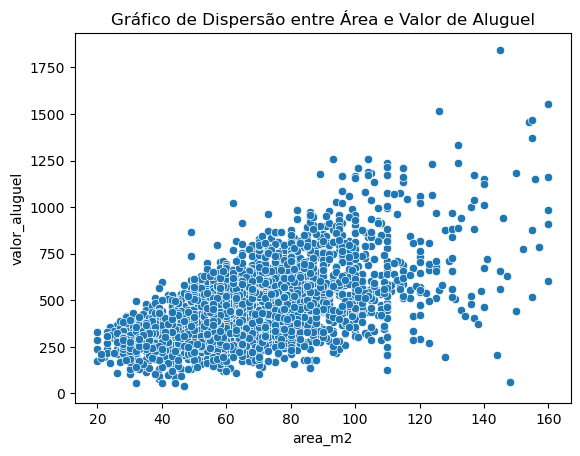

In [146]:
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')
plt.title('Gráfico de Dispersão entre Área e Valor de Aluguel')
plt.show()

## Construção do Modelo OLS (Ordinary Least Squares) com Statsmodels 

In [150]:
# Variável dependente
y = df['valor_aluguel']
# Variável independente
X = df['area_m2']

# O statsmodel requer que a variável independente tenha uma constante
X = sm.add_constant(X)

X.head()

,const,area_m2
0,1.0,35
1,1.0,104
2,1.0,29
3,1.0,39
4,1.0,97


In [151]:
# Criando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

resultado = modelo.summary()

print(resultado)

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Fri, 09 May 2025   Prob (F-statistic):          6.84e-275
Time:                        19:20:43   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

R² = 0.342 indica que o modelo não é suficiente para explicar a variação dos dados.
p-value < 0.05 indica que a variável área é estatisticamente significativa.

Text(0.5, 1.0, 'Gráfico de Dispersão entre Área e Valor de Aluguel com Regressão Linear')

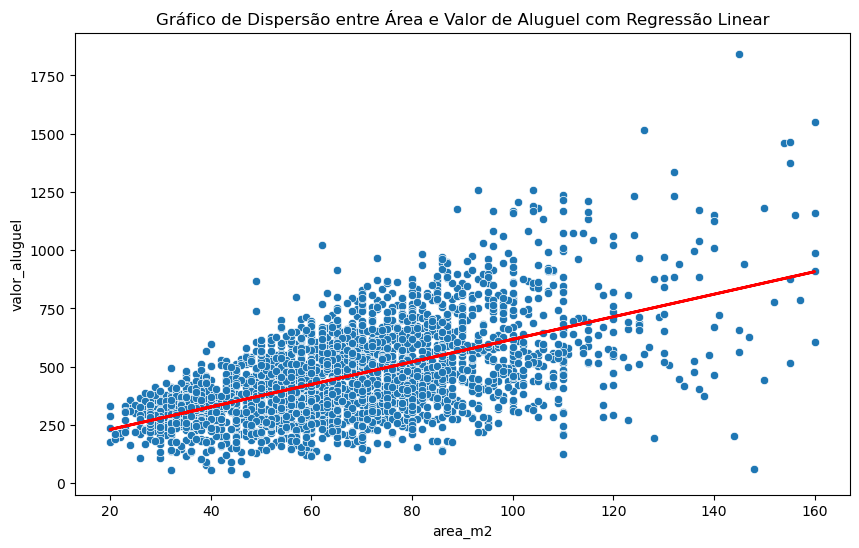

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')
plt.plot(df['area_m2'], modelo.predict(X), color='red', linewidth=2)
plt.title('Gráfico de Dispersão entre Área e Valor de Aluguel com Regressão Linear')

## Regressão Linear Múltipla

 Testando a influência de outras variáveis (Número de banheiros, número de cozinhas e ano de construção)

In [193]:
# Variáveis independentes
X2 = df[['area_m2', 'numero_banheiros', 'numero_cozinhas', 'ano_construcao']]
# constante
X2 = sm.add_constant(X)
# Criando o modelo de regressão linear
modelo2 = sm.OLS(y, X2).fit()

print(modelo2.summary2())

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.438     
Dependent Variable:    valor_aluguel      AIC:                  38453.2177
Date:                  2025-05-10 10:50   BIC:                  38483.2495
No. Observations:      3000               Log-Likelihood:       -19222.   
Df Model:              4                  F-statistic:          585.9     
Df Residuals:          2995               Prob (F-statistic):   0.00      
R-squared:             0.439              Scale:                21551.    
--------------------------------------------------------------------------
                   Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------------
const            -4401.2002 247.1858 -17.8052 0.0000 -4885.8713 -3916.5290
area_m2              5.1285   0.1202  42.6573 0.0000     4.8928     5.3642
numero_banheiros    70.0073  11.5660   6.0529 0

 O modelo de regressão melhorou com a inclusão de mais variáveis independentes, pois o R² aumentou de 0.43.
 Todas as variáveis incluidas no modelo foram significativas, com p-valor < 0,05.

### Análise dos resíduos

In [229]:
residuos = modelo.resid

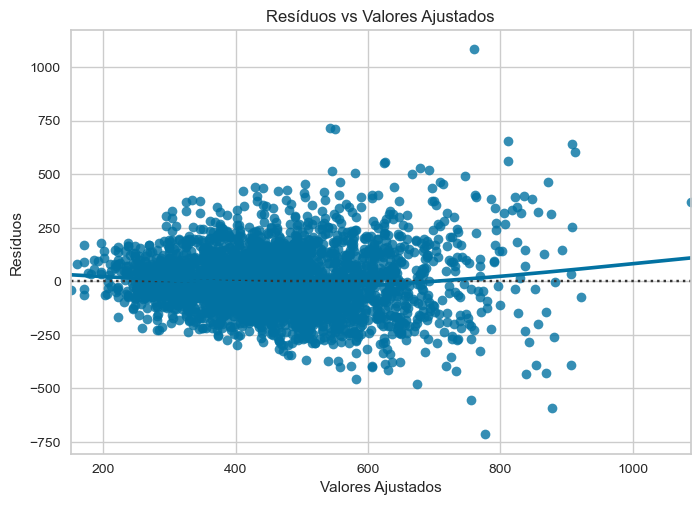

In [230]:
sns.residplot(x=modelo.fittedvalues, y=residuos, lowess=True)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

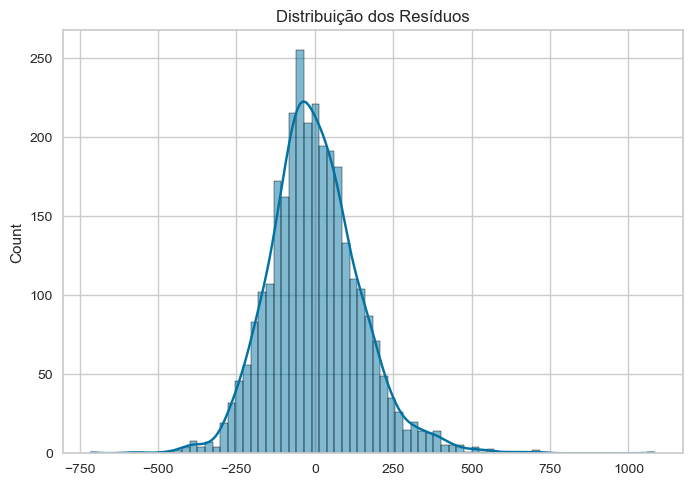

In [231]:
# Histograma
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()


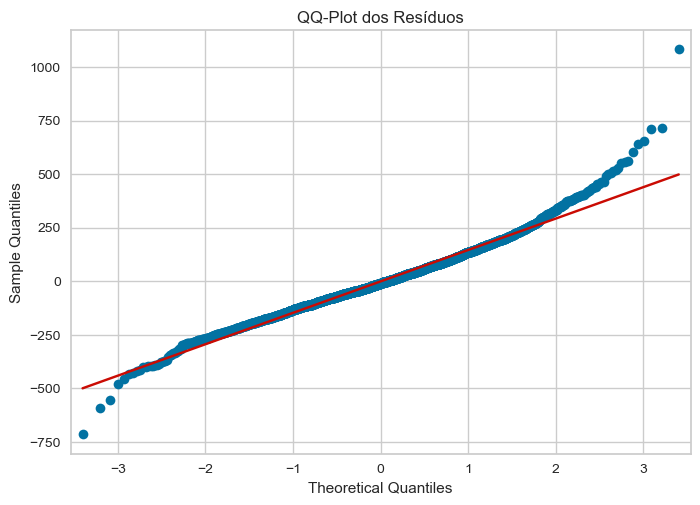

In [232]:
# QQ-plot
sm.qqplot(residuos, line='s')
plt.title('QQ-Plot dos Resíduos')
plt.show()

In [233]:
from scipy.stats import shapiro
stat, p = shapiro(residuos)
print(f'Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}')

Shapiro-Wilk: stat=0.978, p=0.000


O teste Shapiro-wilk apresentou um p-valor o-valor < 0,05, ou seja, os resíduos não seguem uma distribuição normal, 
o que viola uma das suposições da regressão linear clássica.


In [234]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuos, modelo.model.exog)

nomes = ['LM', 'LM p-valor', 'F', 'F p-valor']
print(dict(zip(nomes, bp_test)))

{'LM': 414.14479197834106, 'LM p-valor': 2.442392938178192e-88, 'F': 119.9181269051108, 'F p-valor': 5.049044329438602e-95}


O teste de Homocedasticidade rejeita a hipoótese nula (p-valor<  0,05), ou seja, o modelo apresenta heterocedasticidade,  a variância dos erros não é constante, isso viola outra suposição da regressão linear.

**Concluíndo, com base no gráfico de resíduos e nos resultados dos testes:** 
O teste mostra heterocedasticidade e o gráfico moatra que os resíduos aumentam com os valores ajustados.
O teste de Shapiro-Wilk também indicou não normalidade dos resíduos.
Ainda assim, todas as variáveis do modelo são estatisticamente significativas (p-valor < 0.05).
O modelo está capturando parte da estrutura dos dados, mas as suposições de normalidade e homocedasticidade estão sendo violadas

### Aplicando transformação na variável dependente

#### Transformação box-cox

In [187]:
from scipy.stats import boxcox
y_boxcox, lambda_bc = boxcox(y)

lambda_bc

0.22674380888719198

In [188]:
modelo2 = sm.OLS(y_boxcox, X).fit()
print(modelo2.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.422    
Dependent Variable:   y                AIC:                9950.0259
Date:                 2025-05-10 10:45 BIC:                9980.0578
No. Observations:     3000             Log-Likelihood:     -4970.0  
Df Model:             4                F-statistic:        548.2    
Df Residuals:         2995             Prob (F-statistic): 0.00     
R-squared:            0.423            Scale:              1.6114   
--------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
const            -33.3437   2.1374 -15.5998 0.0000 -37.5347 -29.1527
area_m2            0.0431   0.0010  41.4708 0.0000   0.0411   0.0452
numero_banheiros   0.4280   0.1000   4.2793 0.0000   0.2319   0.6241
numero_cozinhas    0.7584   0.1167   6.5009 0.0000   

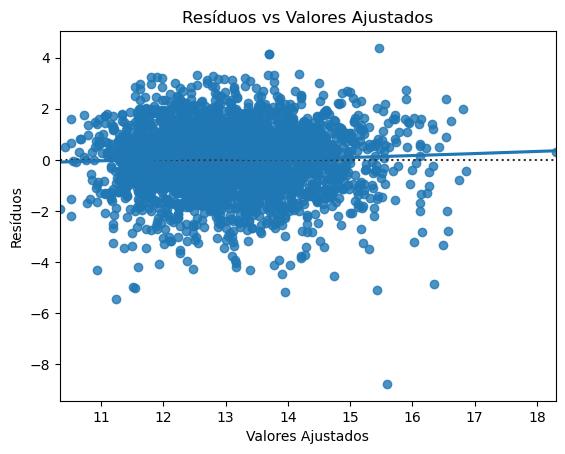

In [189]:
residuos2 = modelo2.resid
sns.residplot(x=modelo2.fittedvalues, y=residuos2, lowess=True)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

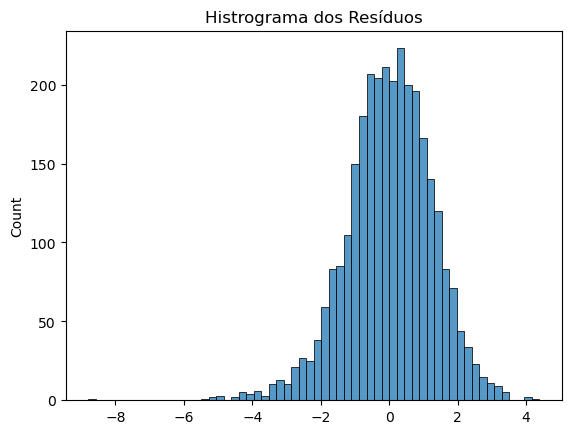

In [190]:
plt.title('Histrograma dos Resíduos')
sns.histplot(residuos2)
plt.show()

In [191]:
bp_test = het_breuschpagan(residuos2, modelo2.model.exog)
print(dict(zip(nomes, bp_test)))

{'LM': 165.23255347189624, 'LM p-valor': 1.1028024533134949e-34, 'F': 43.64304188818258, 'F p-valor': 1.1949721483044202e-35}


In [192]:
stat, p = shapiro(residuos2)
print(f'Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}')

Shapiro-Wilk: stat=0.987, p=0.000


Com a transformação box-cox foi possível corrigir a heterocedasticidade (p-valor > 0.05), porém a suposição de normalidade dos resíduos continua sendo violada (p-valor < 0.05).

## Regressão Linear Multipla com variável categórica

Testando a adição da variável categórica localidade.

In [204]:
# Transformando a variável localidade em dummie
X3 = pd.get_dummies(df[['codigo_localidade']], prefix='localidade')

X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   localidade_1  3000 non-null   uint8
 1   localidade_2  3000 non-null   uint8
 2   localidade_3  3000 non-null   uint8
dtypes: uint8(3)
memory usage: 8.9 KB


In [207]:
X3 = pd.concat([X2, X3],  axis=1)

X3.head()

,const,area_m2,numero_banheiros,numero_cozinhas,ano_construcao,localidade_1,localidade_2,localidade_3
0,1.0,35,0,0,1939,1,0,0
1,1.0,104,1,0,1939,1,0,0
2,1.0,29,0,0,1971,0,1,0
3,1.0,39,0,0,1972,0,1,0
4,1.0,97,0,0,1985,1,0,0


In [214]:
# Criando o modelo de regressão linear
modelo3 = sm.OLS(y, X3).fit()

print(modelo3.summary2())

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.459     
Dependent Variable:    valor_aluguel      AIC:                  38341.4150
Date:                  2025-05-10 11:30   BIC:                  38383.4595
No. Observations:      3000               Log-Likelihood:       -19164.   
Df Model:              6                  F-statistic:          425.3     
Df Residuals:          2993               Prob (F-statistic):   0.00      
R-squared:             0.460              Scale:                20749.    
--------------------------------------------------------------------------
                   Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------------
const            -3500.1105 184.1198 -19.0100 0.0000 -3861.1247 -3139.0962
area_m2              5.0308   0.1184  42.4908 0.0000     4.7986     5.2629
numero_banheiros    66.2857  11.3539   5.8382 0

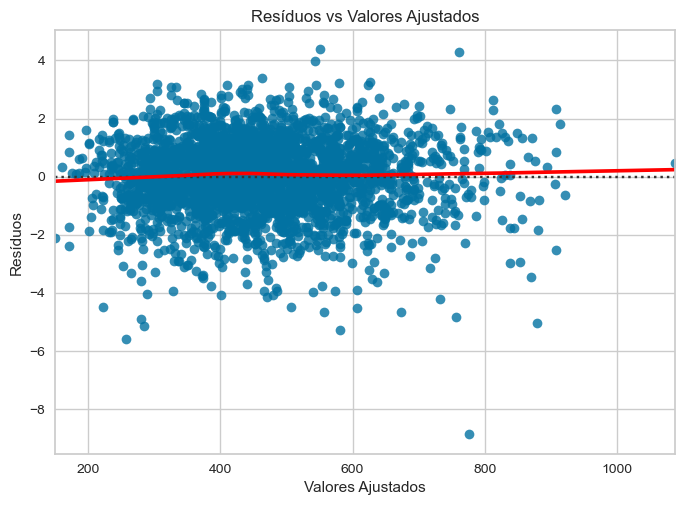

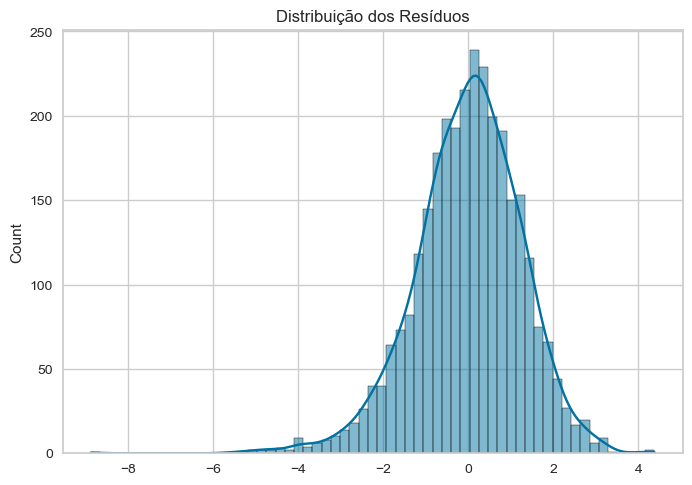

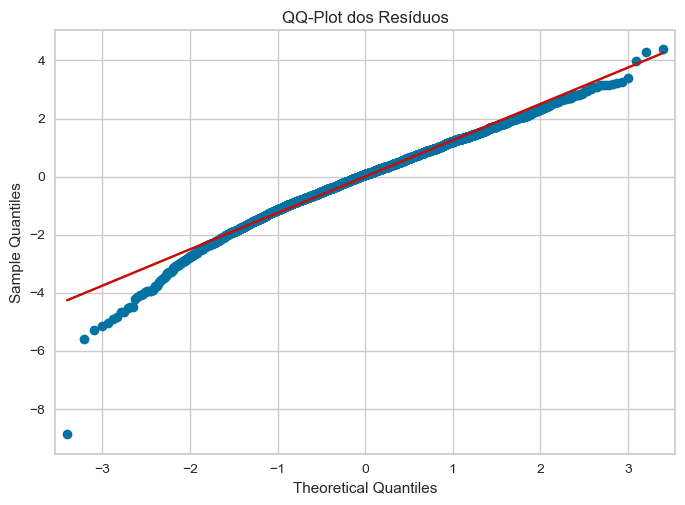

In [239]:
residuos = modelo3.resid

sns.residplot(x=modelo.fittedvalues, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()

# QQ-plot
sm.qqplot(residuos, line='s')
plt.title('QQ-Plot dos Resíduos')
plt.show()

In [235]:
y_boxcox, lambda_bc = boxcox(y)

lambda_bc

0.22674380888719198

In [237]:
# Criando o modelo de regressão linear
modelo3_box = sm.OLS(y_boxcox, X3).fit()

print(modelo3_box.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.437    
Dependent Variable:   y                AIC:                9874.9215
Date:                 2025-05-10 11:44 BIC:                9916.9661
No. Observations:     3000             Log-Likelihood:     -4930.5  
Df Model:             6                F-statistic:        388.3    
Df Residuals:         2993             Prob (F-statistic): 0.00     
R-squared:            0.438            Scale:              1.5706   
--------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
const            -26.5426   1.6019 -16.5697 0.0000 -29.6834 -23.4017
area_m2            0.0424   0.0010  41.1982 0.0000   0.0404   0.0445
numero_banheiros   0.4013   0.0988   4.0628 0.0000   0.2076   0.5950
numero_cozinhas    0.7516   0.1152   6.5258 0.0000   

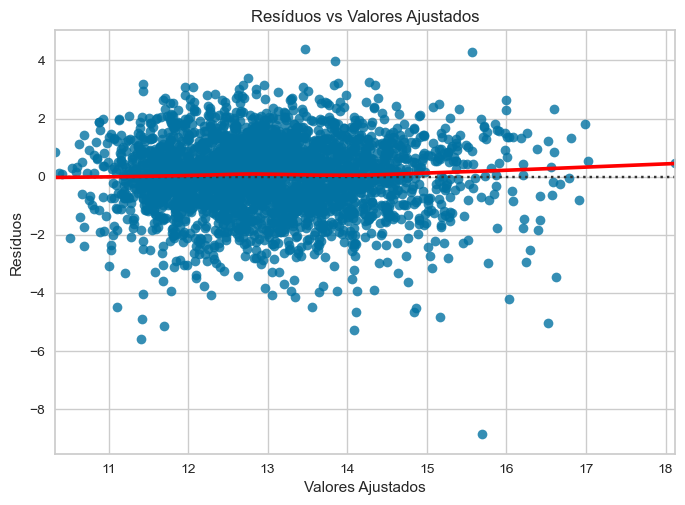

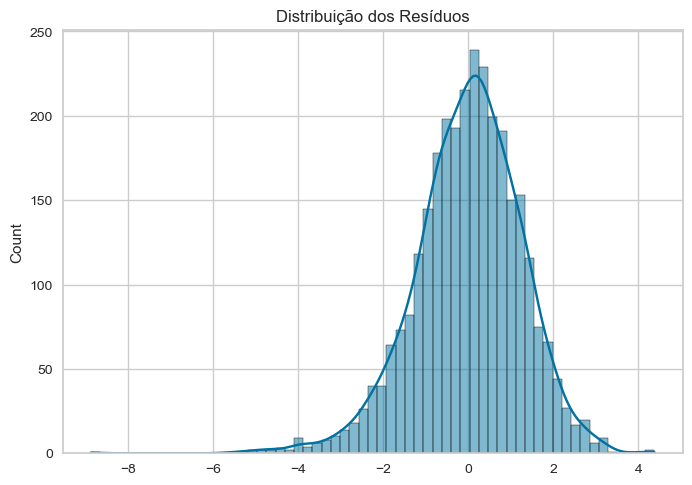

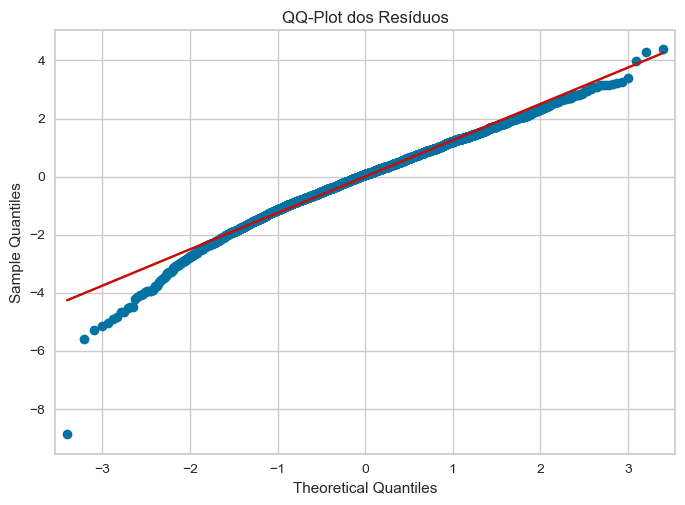

In [240]:
residuos = modelo3_box.resid
sns.residplot(x=modelo3_box.fittedvalues, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()

# QQ-plot
sm.qqplot(residuos, line='s')
plt.title('QQ-Plot dos Resíduos')
plt.show()

In [241]:
bp_test = het_breuschpagan(residuos, modelo3_box.model.exog)
print(dict(zip(nomes, bp_test)))

stat, p = shapiro(residuos)
print(f'Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}')

{'LM': 165.7727769427496, 'LM p-valor': 1.9528440214955748e-32, 'F': 29.176555156038233, 'F p-valor': 3.992197779193241e-34}
Shapiro-Wilk: stat=0.984, p=0.000
